# 1. Importación de librerías

In [2]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

# 2. Limpieza y Perfilamiento de Datos

## 2.1 Importación de librerías

In [3]:
# Librería Natural Language Toolkit, usada para trabajar con textos.

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#El lemmatizer de NLTK NO funciona en español, por lo que se usará el de Stanza.

import stanza
stanza.download('es')

2024-04-05 07:14:26 INFO: Downloaded file to C:\Users\juanm\stanza_resources\resources.json
2024-04-05 07:14:26 INFO: Downloading default packages for language: es (Spanish) ...
2024-04-05 07:14:28 INFO: File exists: C:\Users\juanm\stanza_resources\es\default.zip
2024-04-05 07:14:35 INFO: Finished downloading models and saved to C:\Users\juanm\stanza_resources


In [5]:
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')

2024-04-05 07:14:35 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-05 07:14:35 INFO: Downloaded file to C:\Users\juanm\stanza_resources\resources.json
2024-04-05 07:14:36 INFO: Loading these models for language: es (Spanish):
| Processor | Package         |
-------------------------------
| tokenize  | ancora          |
| mwt       | ancora          |
| pos       | ancora_charlm   |
| lemma     | ancora_nocharlm |

2024-04-05 07:14:36 INFO: Using device: cpu
2024-04-05 07:14:36 INFO: Loading: tokenize
2024-04-05 07:14:36 INFO: Loading: mwt
2024-04-05 07:14:36 INFO: Loading: pos
2024-04-05 07:14:36 INFO: Loading: lemma
2024-04-05 07:14:36 INFO: Done loading processors!


In [6]:
# Instalación de librerias
import sys
import re, string, unicodedata

from nltk.tokenize import WordPunctTokenizer 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.base import BaseEstimator, ClassifierMixin

## 2.2 Lectura de los datos

In [7]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('train_reviews.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_train=data

In [8]:
data_train

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3
...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4
7871,"Fue una escapada de un día desde el complejo, ...",4
7872,La Plaza de la Revolución es un lugar emblemát...,3
7873,Es la segunda ocasión que me quedo en los cuar...,1


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


## 2.3 Entendimiento de los datos

In [10]:
from scipy import stats as st

textos = data_train.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]

#Por ahora: La moda no da información relevante
"""def moda(textos):
    for i in textos['Review']: 
        dict = {}
        for x in i.split(' '): 
            print(i)
        
            if x in dict.keys():
                dict[x] += 1
            else:
                dict[x] = 1

        max_key = max(dict, key=dict.get)
        print(max_key)

moda(textos)
"""
#textos['Moda'] =
#Max tiene el máximo tamaño de la palabra
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
#Min tiene el minimo tamaño de la palabra
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]

def frecuenciaPalabras(texto):
    frecuenciaPalabras = {}

    for i in texto: 
        for x in i.split(' '): 
            if x in frecuenciaPalabras.keys():
                frecuenciaPalabras[x] += 1
            else:
                frecuenciaPalabras[x] = 1

    print(frecuenciaPalabras)
    return frecuenciaPalabras

In [11]:
dictFrec = frecuenciaPalabras(textos['Review'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)


df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'Muy': 461, 'buena': 958, 'atención': 602, 'y': 18843, 'aclaración': 1, 'de': 25036, 'dudas': 31, 'por': 4448, 'parte': 527, 'la': 17275, 'señorita': 30, 'Verónica': 1, 'castillo,': 21, 'atenta': 19, 'amable': 258, 'en': 13617, 'cuestión': 27, 'laborable.': 1, '': 3487, 'Ideal': 17, 'para': 6006, 'descansar': 56, 'muy': 5850, 'buenas': 197, 'habitaciónes,': 1, 'limpieza,': 40, 'ordenadas.': 1, 'Buena': 86, 'comida': 1761, 'del': 4051, 'restaurante,variedad': 1, 'comidas': 87, 'Buen': 89, 'hotel': 2641, 'si': 1558, 'están': 534, 'obligados': 5, 'a': 8410, 'estar': 359, 'cerca': 338, 'centro': 398, 'convenciones,': 3, 'pero': 3398, 'el': 13145, 'restaurante': 804, 'necesita': 86, 'mejorar!': 1, 'Frío': 1, 'café': 140, 'flojo': 6, '-': 548, 'un': 8052, 'montón': 246, 'pan': 51, 'personas': 435, 'que': 15619, 'sirve': 60, 'unos': 373, 'uderstanding': 1, 'bu': 1, 'lo': 3650, 'significa': 22, 'servicio.': 127, 'En': 717, 'este': 1612, 'barrio': 43, 'con': 5311, 'tan': 509, 'pocas': 78, 'opc

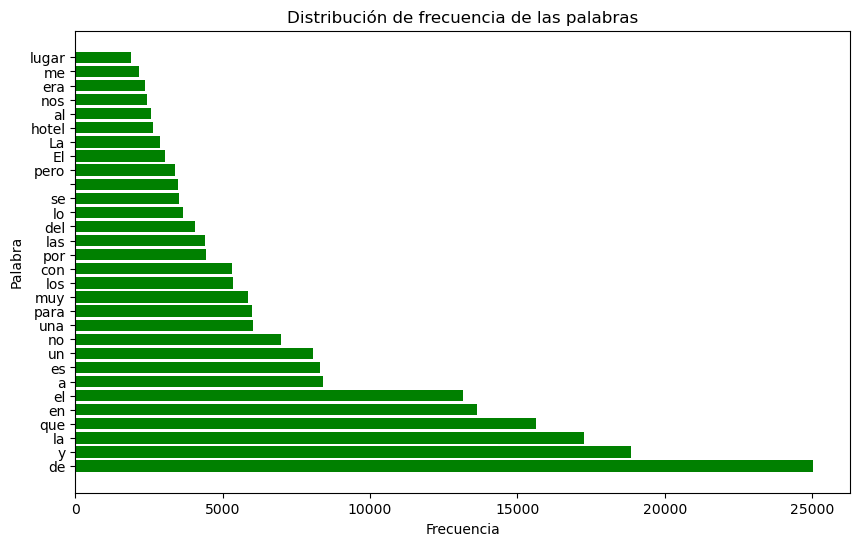

In [12]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)

fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

) missing from current font.ng\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


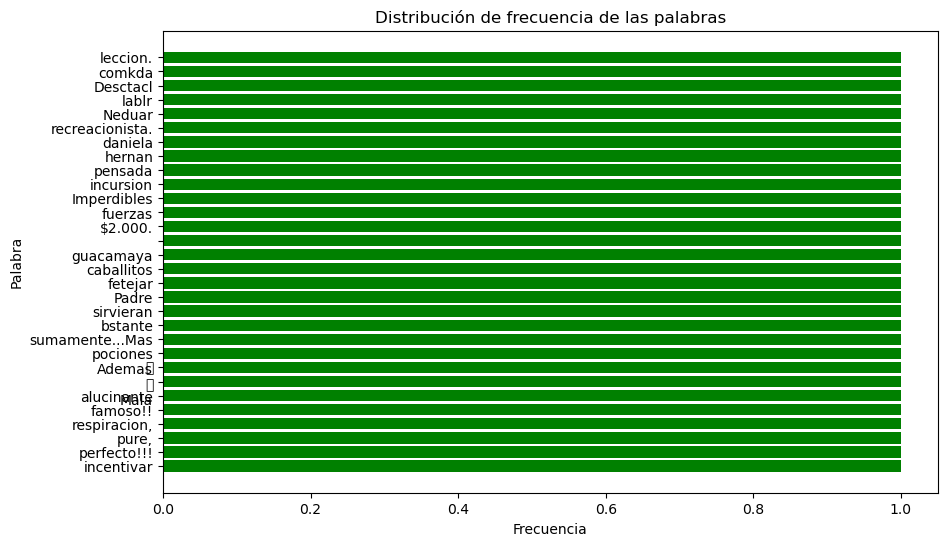

In [13]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [14]:
textos

,Review,Class,Conteo,Max,Min
0,Muy buena atención y aclaración de dudas por p...,5,252,20,0
1,Buen hotel si están obligados a estar cerca de...,3,297,13,1
2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1
3,Abusados con la factura de alimentos siempre s...,3,422,14,1
4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1
...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,113,11,2
7871,"Fue una escapada de un día desde el complejo, ...",4,261,12,2
7872,La Plaza de la Revolución es un lugar emblemát...,3,777,14,1
7873,Es la segunda ocasión que me quedo en los cuar...,1,651,12,0


In [15]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textos)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textos)'

## 2.4 Limpieza de los datos

## 2.4.1 Duplicados

In [16]:
textos.duplicated(keep = False).sum()

102

In [17]:
textos.drop_duplicates(keep='first', inplace=True)
textos.duplicated(keep = False).sum()

0

In [18]:
print(textos['Review'][1201])
textos['Review'] = textos['Review'].replace(r'\d+,\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+.\d+', '', regex=True)
print(textos['Review'][1201])

El día lunes 17 de setiembre 2012 visite con mi familia Monserratte y debía pagar un taxi, por lo que a las 12 M.D, fui a la taquilla para cambiar 50,000 pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los 50,000 al empleado en la taquilla y me estafó, me dió un billete de 20,000 encima y debajo venia uno de 2,000 y luego el otro de 1,000.  El funcionario de la taquilla me estafó con el cambio y se dejó 27,000 pesos. Es bueno que sepan que tienen un ladrón trabajando en sus instalaciones y así como fui estafado yo, me imagino que también otros Turistas pasan por lo mismo. Revise muy bien su cambio en la ventanilla porque le pordría pasar lo mismo.
El día lunes  de setiembre  visite con mi familia Monserratte y debía pagar un taxi, por lo que a las  M.D, fui a la taquilla para cambiar  pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los  al empleado en la taquilla y me estafó, me dió un billete de  encima y debajo venia uno de 

In [19]:
spanish_stopwords = stopwords.words('spanish')
print(spanish_stopwords)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words
    

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

#def replace_numbers(words):
#    """Replace all interger occurrences in list of tokenized words with textual representation"""
#    p = inflect.engine()
#    print(words)
#    new_words = []
#    for word in words:
#        if word.isdigit():
#            new_word = p.number_to_words(word)
#            new_words.append(new_word)
#            print("if " + new_word)
#        else:
#            new_words.append(word)
#    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in spanish_stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
 #   words = replace_numbers(words)
    words = remove_punctuation(words)
#    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

## 2.4.2 Tokenización

In [20]:
textos['tokens'] = [ WordPunctTokenizer().tokenize(i) for i in textos['Review']]
    
textos.iloc[1201]['tokens']

['Lugar',
 'especial',
 'para',
 'un',
 'atardecer',
 'o',
 'para',
 'conocer',
 'cómo',
 'son',
 'los',
 'cubanos',
 'y',
 'cubanas',
 ',',
 'auténtico',
 'y',
 'romántico',
 '.',
 'Inicio',
 'y',
 'fin',
 'de',
 'muchas',
 'cosas',
 ':',
 'el',
 'amor',
 ',',
 'la',
 'aventura',
 ',',
 'la',
 'ciudad',
 'y',
 'el',
 'mar',
 '.']

In [21]:
textos['tokens'].dropna()

0       [Muy, buena, atención, y, aclaración, de, duda...
1       [Buen, hotel, si, están, obligados, a, estar, ...
2       [Es, un, lugar, muy, lindo, para, fotografías,...
3       [Abusados, con, la, factura, de, alimentos, si...
4       [Tuvimos, un, par, de, personas, en, el, grupo...
                              ...                        
7870    [Me, parece, buen, sistema, ,, agiliza, el, tr...
7871    [Fue, una, escapada, de, un, día, desde, el, c...
7872    [La, Plaza, de, la, Revolución, es, un, lugar,...
7873    [Es, la, segunda, ocasión, que, me, quedo, en,...
7874    [Llegamos, por, casualidad, a, Los, Mercaderes...
Name: tokens, Length: 7802, dtype: object

## 2.4.3 Eliminación de ruido

In [22]:
textos['tokens']=textos['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

textos.head()

,Review,Class,Conteo,Max,Min,tokens
0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,"[buena, atención, aclaración, dudas, parte, se..."
1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,"[buen, hotel, si, obligados, cerca, centro, co..."
2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,"[lugar, lindo, fotografías, visiten, selina, m..."
3,Abusados con la factura de alimentos siempre s...,3,422,14,1,"[abusados, factura, alimentos, siempre, echan,..."
4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,"[par, personas, grupo, realmente, queríamos, c..."


In [23]:
textos['tokens'] = textos['tokens'].apply(lambda x: ' '.join(map(str, x)))
textos.head()

,Review,Class,Conteo,Max,Min,tokens
0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,buena atención aclaración dudas parte señorita...
1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,buen hotel si obligados cerca centro convencio...
2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,lugar lindo fotografías visiten selina música ...
3,Abusados con la factura de alimentos siempre s...,3,422,14,1,abusados factura alimentos siempre echan culpa...
4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,par personas grupo realmente queríamos comer c...


## 2.4.4 Normalización

In [24]:
"""stemmer = SnowballStemmer('spanish')

textos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]
i = 1201
print(textos['tokens'][i])
print(textos['Review'][i])"""

"stemmer = SnowballStemmer('spanish')\n\ntextos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]\ni = 1201\nprint(textos['tokens'][i])\nprint(textos['Review'][i])"

In [25]:
""" def lemmatizer(review):

    print(review)
    
    #print(row.name)
    doc  =  nlp(review)
    #print (review)
    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]
    finalLemma =[]
    for sent in lemma:
        for word in sent:  
            finalLemma.append(word)
    #print(finalLemma)

    return finalLemma

textos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización """

" def lemmatizer(review):\n\n    print(review)\n    \n    #print(row.name)\n    doc  =  nlp(review)\n    #print (review)\n    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]\n    finalLemma =[]\n    for sent in lemma:\n        for word in sent:  \n            finalLemma.append(word)\n    #print(finalLemma)\n\n    return finalLemma\n\ntextos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización "

In [26]:
"""def oneSentence(list):
    complete = []
    for sent in list:
        for word in sent:
            complete.append(word)

    return complete

textos['tokens'] = [oneSentence(i) for i in textos['tokens']]"""

"def oneSentence(list):\n    complete = []\n    for sent in list:\n        for word in sent:\n            complete.append(word)\n\n    return complete\n\ntextos['tokens'] = [oneSentence(i) for i in textos['tokens']]"

In [27]:
#Codigo para guardar los lemas en csv
#textos.to_csv('lemaSinStopWords.csv')

In [28]:
#Leer archivo previamente guardado de lemas
from ast import literal_eval
textosLemas = pd.read_csv('lemaSinStopWords.csv', sep=',', encoding = 'utf-8')
textosLemas['tokens'] = textosLemas['tokens'].apply(literal_eval)

In [29]:
textosLemas['tokens']=textosLemas['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

## 2.4.5 Selección de campos

In [30]:
textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,"[buen, atención, aclaración, duda, parte, seño..."
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,"[buen, hotel, si, obligado, cerca, centro, con..."
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,"[lugar, lindo, fotografía, visitar, selino, mú..."
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,"[abusado, factura, alimento, siempre, echar, c..."
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,"[par, persona, grupo, realmente, querer, comer..."


In [31]:
textosLemas['tokens'] = textosLemas['tokens'].apply(lambda x: ' '.join(map(str, x)))
textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,buen atención aclaración duda parte señorito v...
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,buen hotel si obligado cerca centro convención...
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,lugar lindo fotografía visitar selino música v...
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,abusado factura alimento siempre echar culpa i...
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,par persona grupo realmente querer comer cabri...


## 2.5 División en conjuntos train, test y validación

In [32]:
x_train, x_test = train_test_split(textosLemas, test_size=0.45, random_state=1) 
print(x_train.shape, x_test.shape)
x_train_completo = x_train
x_train, x_val = train_test_split(x_train, test_size=0.25, random_state=1)

print( x_test.shape,x_train.shape, x_val.shape)

(4291, 7) (3511, 7)
(3511, 7) (3218, 7) (1073, 7)


## 2.6 Segundo profile tras aplicación de preprocessing

In [33]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textosLemas)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textosLemas)'

In [34]:
dictFrecuenciasTokenizado = frecuenciaPalabras(textosLemas['tokens'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrecuenciasTokenizado, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)


df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'buen': 3521, 'atención': 765, 'aclaración': 2, 'duda': 347, 'parte': 623, 'señorito': 27, 'verónico': 1, 'castillo': 125, 'atento': 315, 'amable': 597, 'cuestión': 34, 'laborable': 1, 'ideal': 98, 'descansar': 108, 'habitación': 2689, 'limpieza': 263, 'ordenado': 43, 'comida': 2267, 'restaurante': 1587, 'variedad': 225, 'hotel': 3970, 'si': 2198, 'obligado': 161, 'cerca': 411, 'centro': 492, 'convención': 14, 'necesitar': 287, 'mejorar': 187, 'frío': 124, 'café': 232, 'flojo': 13, 'montón': 253, 'pan': 66, 'persona': 736, 'servir': 266, 'uderstanding': 1, 'bu': 1, 'significar': 41, 'servicio': 2204, 'barrio': 66, 'opción': 353, 'deber': 701, 'ser': 1174, 'especial': 274, 'lugar': 2755, 'lindo': 299, 'fotografía': 60, 'visitar': 980, 'selino': 2, 'música': 282, 'vivo': 122, 'cerveza': 92, 'artesanal': 21, 'abusado': 1, 'factura': 79, 'alimento': 195, 'siempre': 537, 'echar': 41, 'culpa': 12, 'ir': 1747, 'buscar': 206, 'rfc': 1, 'proporcionar': 58, 'independisar': 1, 'base': 39, 'regis

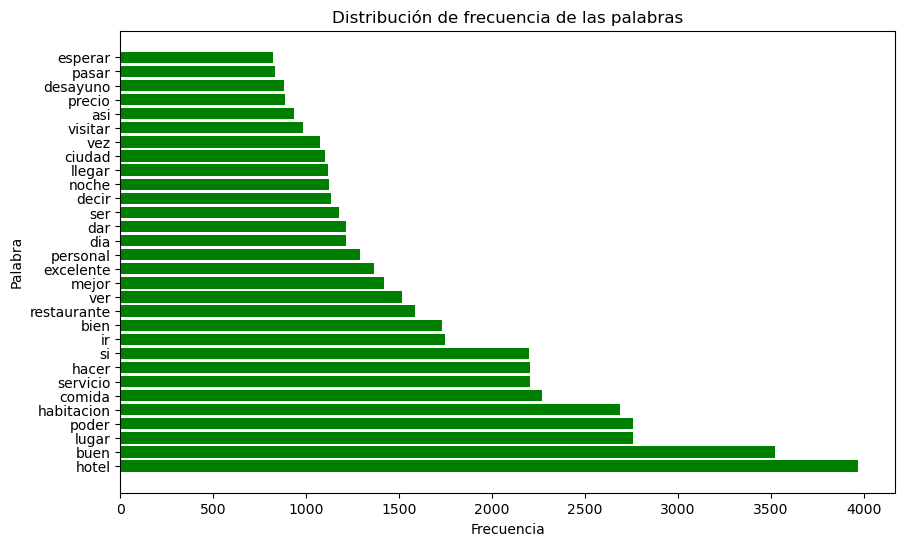

In [35]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)

fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

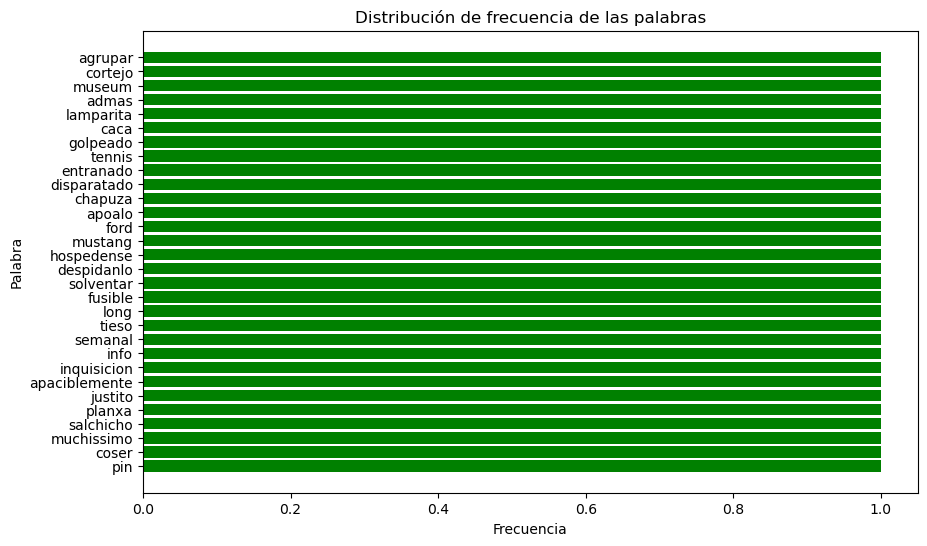

In [36]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [37]:
x_train_completo, y_train_completo = x_train_completo['tokens'],x_train_completo['Class']
x_train, y_train = x_train['tokens'],x_train['Class']
x_val, y_val = x_val['tokens'],x_val['Class']
x_test, y_test = x_test['tokens'],x_test['Class']

## 2.7 Embedding del texto

## 2.7.1 Count Vectorizer

In [38]:
count = CountVectorizer()
x_train_countVectorizer = count.fit_transform(x_train)
print(x_train_countVectorizer.shape)
x_train_countVectorizer.toarray()[3]

x_val_countVectorizer = count.transform(x_val)
print(x_val_countVectorizer.shape)
x_val_countVectorizer.toarray()[3]

x_test_countVectorizer = count.transform(x_test)
print(x_test_countVectorizer.shape)
x_test_countVectorizer.toarray()[3]

(3218, 10156)
(1073, 10156)
(3511, 10156)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 2.7.2 TfiDf

In [39]:
tfidf = TfidfVectorizer()
x_train_completo_tfidfVectorizer = tfidf.fit_transform(x_train_completo)
print(x_train_completo_tfidfVectorizer.shape)
x_train_completo_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_completo_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))

x_train_tfidfVectorizer = tfidf.transform(x_train)
print(x_train_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))

x_test_tfidfVectorizer = tfidf.transform(x_test)
print(x_test_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_test = pd.DataFrame(x_test_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_test = df_test.sort_values('TF-IDF', ascending=False)
#print(df_test.head(20))

x_val_tfidfVectorizer = tfidf.transform(x_val)
print(x_val_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

#print(x_val_tfidfVectorizer[0].T)

df_val = pd.DataFrame(x_val_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_val = df_val.sort_values('TF-IDF', ascending=False)
#print(df_val.head(20))

(4291, 11836)
(3218, 11836)
(3511, 11836)
(1073, 11836)


## 2.8 Visualización de los datos

In [40]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=30, random_state=42)
principalComponentsTrain = svd.fit_transform(x_train_tfidfVectorizer)

In [41]:
dfSVD = pd.DataFrame(data = principalComponentsTrain)

In [42]:
dfSVD.tail()

,0,1,2,3,4
3213,0.137729,-0.091401,-0.025629,0.022487,0.029674
3214,0.090501,0.032606,0.074565,0.121979,0.020137
3215,0.155343,0.075275,-0.029139,-0.062221,0.059033
3216,0.055368,-0.039916,0.006526,-0.009143,-0.015747
3217,0.119246,0.070814,-0.035164,0.040052,-0.005965


In [43]:
print('Variacion explicada por cada componente: {}'.format(svd.explained_variance_ratio_.sum()))

Variacion explicada por cada componente: 0.028550822753060427


# 3. Algoritmo Regresión Logística

A continuación, se utilizará el algoritmo de regresión logística de la librería sklearn. Inicialmente, se utilizará el algoritmo sin ningún parámetro para ver las métricas que arroje y luego se hará una búsqueda de parámetros para ver cuales son los mejores y comparar las nuevas métricas obtenidas. En este caso, se utilizará el vectorizador TFIDF, el cual fue aplicado anteriormente en la sección 2. En cada celda se explica el paso a paso de lo que se está realizando.

In [44]:
from sklearn.linear_model import LogisticRegression

# Se crea el clasificador a partir del algoritmo de regresión logística
logistic_regression = LogisticRegression()

# Se entrena el modelo con los datos de entrenamiento
logistic_regression.fit(x_train_tfidfVectorizer, y_train)

# Se hacen predicciones con el modelo a partir de los datos de prueba
y_pred_tfi = logistic_regression.predict(x_test_tfidfVectorizer)


In [45]:
# Se imprime la exactitud del modelo a partir de los datos de prueba
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_tfi)))

Model accuracy score: 0.4563


In [46]:
# Se hacen predicciones con el modelo a partir de los datos de entrenamiento
y_pred_train = logistic_regression.predict(x_train_tfidfVectorizer)

In [47]:
# Se imprime la exactitud del modelo a partir de los datos de entrenamiento
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8524


In [48]:
# Se imprimen los scores de los datos de entrenamiento y prueba
print('Training set score: {:.4f}'.format(logistic_regression.score(x_train_tfidfVectorizer, y_train)))

print('Test set score: {:.4f}'.format(logistic_regression.score(x_test_tfidfVectorizer, y_test)))

Training set score: 0.8524
Test set score: 0.4563


In [49]:
from sklearn.metrics import confusion_matrix

# Se crea la matriz de confusión a partir de las predicciones y los datos de prueba
cm = confusion_matrix(y_test, y_pred_tfi)

<Axes: >

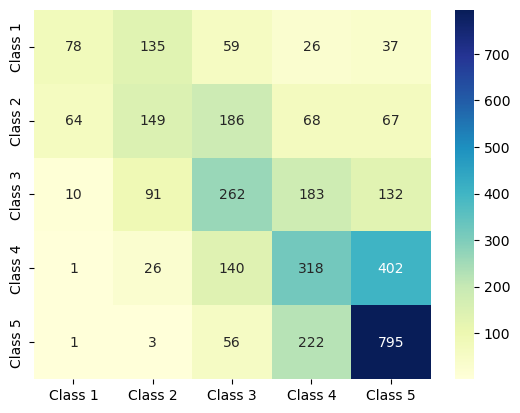

In [50]:
# Se crea un mapa de calor para poder renderizar la matriz de confusión teniendo en cuenta las 5 clases.
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                          index=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [51]:
# Se imprime el reporte de clasificación
report = classification_report(y_test, y_pred_tfi)
print(report)

              precision    recall  f1-score   support

           1       0.51      0.23      0.32       335
           2       0.37      0.28      0.32       534
           3       0.37      0.39      0.38       678
           4       0.39      0.36      0.37       887
           5       0.55      0.74      0.63      1077

    accuracy                           0.46      3511
   macro avg       0.44      0.40      0.40      3511
weighted avg       0.44      0.46      0.44      3511



In [52]:
# Se imprime la exactitud, precisión, recall y f1-score
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_tfi))
print("Recall: {}".format(recall_score(y_test,y_pred_tfi, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_tfi, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_tfi, average="macro")))

Exactitud: 0.46
Recall: 0.39899322282673194
Precisión: 0.43840058664794307
Puntuación F1: 0.40457127940415705


## 3.1 Modelo con mejores parámetros método 1 de búsqueda de hiperparámetros

In [53]:
# Se define una red de posibles parámetros para la búsqueda de hiperparámetros
param_grid = {'C': [0.1,1, 10, 100, 1000],  
              'solver': ['lbfgs','liblinear','newton-cg','newton-cholesky', 'sag', 'saga'],}  

In [54]:
# Se hace una búsqueda "fácil" para ver que resultado arroja
""" best_score= -1000
best_parameters = []
i = 0
for c in param_grid['C']: 
    for k in param_grid['solver']:
        param = [c,k]
        classifier = LogisticRegression(C=c, solver=k)
        classifier.fit(x_val_tfidfVectorizer, y_val)
        score = classifier.score(x_val_tfidfVectorizer, y_val)
        if score> best_score: 
            best_score = score
            best_parameters = [c,k]
        print(1/64*i*100, '%'  )
        i+=1

print(best_score,best_parameters) """

# Se obtuvo [10, lbfgs] --> La ejecución se demoró 54 minutos, por lo cual, se comenta.

" best_score= -1000\nbest_parameters = []\ni = 0\nfor c in param_grid['C']: \n    for k in param_grid['solver']:\n        param = [c,k]\n        classifier = LogisticRegression(C=c, solver=k)\n        classifier.fit(x_val_tfidfVectorizer, y_val)\n        score = classifier.score(x_val_tfidfVectorizer, y_val)\n        if score> best_score: \n            best_score = score\n            best_parameters = [c,k]\n        print(1/64*i*100, '%'  )\n        i+=1\n\nprint(best_score,best_parameters) "

Con esta búsqueda fácil de hiperparámetros se calculan las métricas asociadas a los mejores parámetros con el fin de comparar con las métricas obtenidas anteriormente.

In [55]:
# Se crea el clasificador a partir del algoritmo de regresión logística
logistic_regression = LogisticRegression(C=10, solver='lbfgs')

# Se entrena el modelo con los datos de entrenamiento
logistic_regression.fit(x_train_tfidfVectorizer, y_train)

# Se hacen predicciones con el modelo a partir de los datos de prueba
y_pred_tfi = logistic_regression.predict(x_test_tfidfVectorizer)

c:\Users\juanm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Se crea la matriz de confusión a partir de las predicciones y los datos de prueba
cm = confusion_matrix(y_test, y_pred_tfi)

<Axes: >

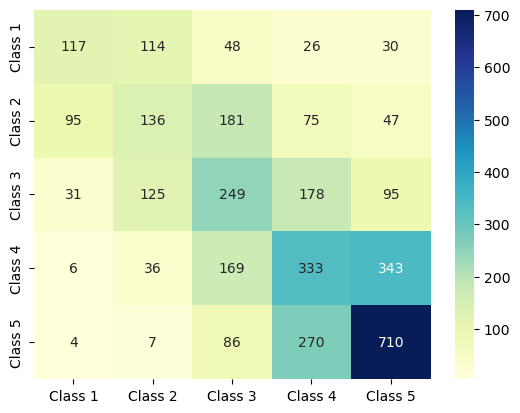

In [57]:
# Se crea un mapa de calor para poder renderizar la matriz de confusión teniendo en cuenta las 5 clases.
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                          index=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [58]:
# Se imprime el reporte de clasificación
report = classification_report(y_test, y_pred_tfi)
print(report)

              precision    recall  f1-score   support

           1       0.46      0.35      0.40       335
           2       0.33      0.25      0.29       534
           3       0.34      0.37      0.35       678
           4       0.38      0.38      0.38       887
           5       0.58      0.66      0.62      1077

    accuracy                           0.44      3511
   macro avg       0.42      0.40      0.41      3511
weighted avg       0.43      0.44      0.43      3511



In [59]:
# Se imprime la exactitud, precisión, recall y f1-score
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_tfi))
print("Recall: {}".format(recall_score(y_test,y_pred_tfi, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_tfi, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_tfi, average="macro")))

Exactitud: 0.44
Recall: 0.40117068313148063
Precisión: 0.4169304330554451
Puntuación F1: 0.4059906887672522


## 3.2 Modelo con mejores parámetros método 2 de búsqueda de hiperparámetros

In [60]:
from sklearn.model_selection import KFold 

# Se crea un objeto de validación cruzada con 3 particiones para encontrar los mejores hiperparámetros
particiones = KFold(n_splits=3,shuffle=True,random_state=0)

In [61]:
# Se crea un modelo en blanco de regresión logística
lr = LogisticRegression()

In [62]:
# Se utiliza la búsqueda de hiperparámetros para encontrar los mejores parámetros
best_model = GridSearchCV(lr, param_grid, cv=particiones,verbose = 3)

In [63]:
# Se entrena el modelo con los datos de entrenamiento para encontrar los mejores parámetros
# best_model.fit(x_train_completo_tfidfVectorizer, y_train_completo)

# Se obtuvo el siguiente resultado --> {'C': 1, 'solver': 'lbfgs'}, la ejecución se demoró 1 hora, por lo cual, se comenta.

In [64]:
# Se imprimen los mejores parámetros
#best_model.best_params_ 

In [65]:
# Se crea el modelo a partir de los mejores parámetros
#lr_final = best_model.best_estimator_

In [66]:
# Se crea el modelo con los mejores parámetros hallados en la segunda búsqueda de hiperparámetros
logistic_regression = LogisticRegression(C=1, solver='lbfgs')

# Se entrena el modelo con los datos de entrenamiento
logistic_regression.fit(x_train_tfidfVectorizer, y_train)

# Se hacen predicciones con el modelo a partir de los datos de prueba
y_pred_tfi = logistic_regression.predict(x_test_tfidfVectorizer)

In [67]:
# Se crea la matriz de confusión a partir de las predicciones y los datos de prueba
cm = confusion_matrix(y_test, y_pred_tfi)

<Axes: >

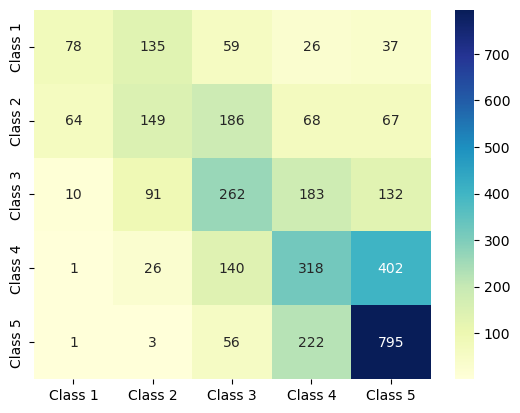

In [68]:
# Se crea un mapa de calor para poder renderizar la matriz de confusión teniendo en cuenta las 5 clases.
cm_matrix = pd.DataFrame(data=cm, 
                          columns=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], 
                          index=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [69]:
# Se imprime el reporte de clasificación
report = classification_report(y_test, y_pred_tfi)
print(report)

              precision    recall  f1-score   support

           1       0.51      0.23      0.32       335
           2       0.37      0.28      0.32       534
           3       0.37      0.39      0.38       678
           4       0.39      0.36      0.37       887
           5       0.55      0.74      0.63      1077

    accuracy                           0.46      3511
   macro avg       0.44      0.40      0.40      3511
weighted avg       0.44      0.46      0.44      3511



In [70]:
# Se imprime la exactitud, precisión, recall y f1-score
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_tfi))
print("Recall: {}".format(recall_score(y_test,y_pred_tfi, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_tfi, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_tfi, average="macro")))

Exactitud: 0.46
Recall: 0.39899322282673194
Precisión: 0.43840058664794307
Puntuación F1: 0.40457127940415705
